In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

In [3]:
RC_circuit_db = pd.read_csv('db_completa_RC_Tecnologia.csv')
RC_circuit_db.head()

,time,voltaje_ent,voltaje_cap_5,Resistencia real,Capacitancia Real
0,0,4.93,0.00,53300,100
1,200,4.93,0.00,53300,100
2,400,4.93,0.02,53300,100
3,600,4.93,0.24,53300,100
4,800,4.93,0.43,53300,100


In [4]:
RC_circuit_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               20000 non-null  int64  
 1   voltaje_ent        20000 non-null  float64
 2   voltaje_cap_5      20000 non-null  float64
 3   Resistencia real   20000 non-null  int64  
 4   Capacitancia Real  20000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 781.4 KB


In [12]:
#X = [tiempo, R, C, Ve]
#y = [Vc]


R = np.hstack([RC_circuit_db['Resistencia real']])
C = np.hstack([RC_circuit_db['Capacitancia Real']])
t = np.hstack([RC_circuit_db['time']])
Ve = np.hstack([RC_circuit_db['voltaje_ent']])

# Input variables
X = np.vstack([R, C, t, Ve]).T

# Target
y = np.hstack([RC_circuit_db['voltaje_cap_5']])

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 2002)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14000, 4)
(6000, 4)
(14000,)
(6000,)


In [14]:
#%% Specify the model
model = LinearRegression()

#%% Fit model on the dataset
model.fit(X_train, # input data
          y_train, # target data
          )

LinearRegression()

In [15]:
# Predict on training data
pred_tr = model.predict(X_train)

# Predict on a test data
pred_te = model.predict(X_test)

In [16]:
print("RMSE (train):", np.sqrt(np.mean( (y_train-pred_tr)**2) ))
print("RMSE (test):", np.sqrt(np.mean( (y_test-pred_te)**2) ))

RMSE (train): 0.7934921324005038
RMSE (test): 0.794990171329719


In [17]:
def regression_results(y_true, y_pred):
    # Regression metrics
    ev = explained_variance_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred) 
    mse = mean_squared_error(y_true, y_pred) 
    r2 = r2_score(y_true, y_pred)

    print('explained_variance: ', round(ev,4))    
    print('MAE: ', round(mae,4))
    print('MSE: ', round(mse,4))
    print('R²: ', round(r2,4))

In [18]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, pred_tr)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, pred_te)
print("")

#%% Results per output
mse_train = mean_squared_error(y_train, pred_tr)

r2_train = r2_score(y_train, pred_tr)

mse_test = mean_squared_error(y_test, pred_te)

r2_test = r2_score(y_test, pred_te)

col_names = ('MSE (train)', 'R2 (train)', 'MSE (test)', 'R2 (test)')

df = np.array([mse_train, r2_train, mse_test, r2_test])

print("")
print('---------- Evaluation per output ----------')
results = pd.DataFrame(data = df.reshape(1,-1), columns = col_names)
print(results)


---------- Evaluation on Training Data ----------
explained_variance:  0.7796
MAE:  0.5744
MSE:  0.6296
R²:  0.7796

---------- Evaluation on Test Data ----------
explained_variance:  0.7818
MAE:  0.5779
MSE:  0.632
R²:  0.7818


---------- Evaluation per output ----------
   MSE (train)  R2 (train)  MSE (test)  R2 (test)
0      0.62963    0.779637    0.632009   0.781785


In [19]:
#scaler = preprocessing.MinMaxScaler(feature_range = (0.1, 0.9))
#X_pol = PolynomialFeatures(degree=2, include_bias=False).fit_transform(scaler.fit_transform(X))
X_pol = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

X_train_pol, X_test_pol, y_train, y_test = train_test_split(X_pol, y, test_size = 0.30, random_state = 2002)

In [20]:
#%% Specify the model
model_pol = LinearRegression()

#%% Fit model on the dataset
model_pol.fit(X_train_pol, # input data
              y_train, # target data
             )

LinearRegression()

In [21]:
y_pred_pol_train = model_pol.predict(X_train_pol)
y_pred_pol_test = model_pol.predict(X_test_pol)

In [22]:
#%% Model Performance Summary    
print("")
print('---------- Evaluation on Training Data ----------')
regression_results(y_train, y_pred_pol_train)
print("")

print('---------- Evaluation on Test Data ----------')
regression_results(y_test, y_pred_pol_test)
print("")


---------- Evaluation on Training Data ----------
explained_variance:  0.9365
MAE:  0.3057
MSE:  0.1816
R²:  0.9365

---------- Evaluation on Test Data ----------
explained_variance:  0.9378
MAE:  0.3043
MSE:  0.1802
R²:  0.9378



In [23]:
print("Coeficientes del modelo lineal: ", model.coef_)
print("Intercepto del modelo lineal: ", model.intercept_)

Coeficientes del modelo lineal:  [1.02506716e-06 1.42153364e-04 3.19684207e-04 3.11760049e-36]
Intercepto del modelo lineal:  0.46160134958092414


In [24]:
print("Coeficientes del modelo polinomial: ", model_pol.coef_)
print("Intercepto del modelo polinomial: ", model_pol.intercept_)

Coeficientes del modelo polinomial:  [-1.16793073e-05  2.12364617e-07  2.52993429e-05 -3.19577061e-17
  4.09422173e-09 -1.72640008e-07  5.19866442e-10 -5.75789850e-05
 -1.46015952e-07  2.75534201e-09  1.04695756e-06 -2.19086408e-08
  1.24725760e-04 -2.39430594e-29]
Intercepto del modelo polinomial:  5.5954953223339245


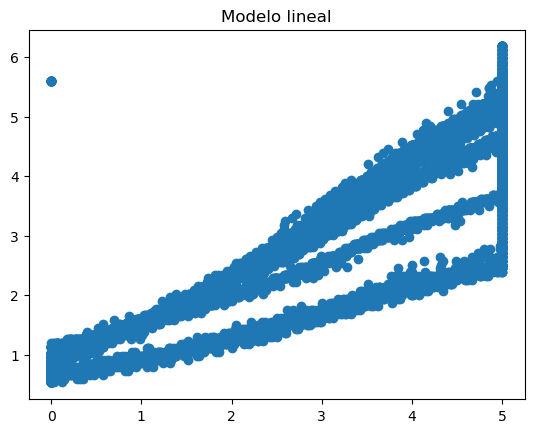

In [25]:
plt.figure()
plt.title('Modelo lineal')
plt.scatter(y_train, pred_tr)
plt.show()

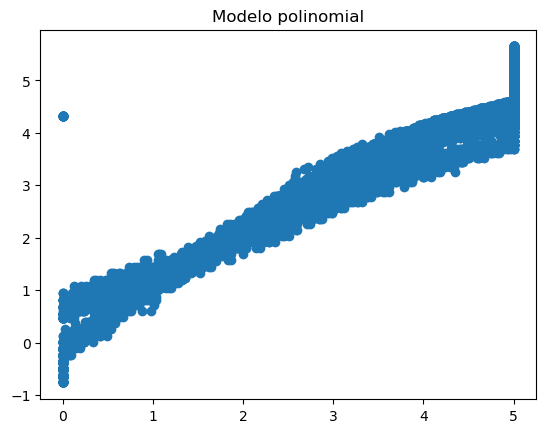

In [26]:
plt.figure()
plt.title('Modelo polinomial')
plt.scatter(y_train, y_pred_pol_train)
plt.show()

In [27]:
import statsmodels.api as sm

In [28]:
y_train_ppi1 = sm.add_constant(y_train, prepend=True)
ppi1 = sm.OLS(pred_tr, y_train_ppi1)
ppi1 = ppi1.fit()
print(ppi1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 4.952e+04
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:21:30   Log-Likelihood:                -14884.
No. Observations:               14000   AIC:                         2.977e+04
Df Residuals:                   13998   BIC:                         2.979e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7133      0.013     55.756      0.0

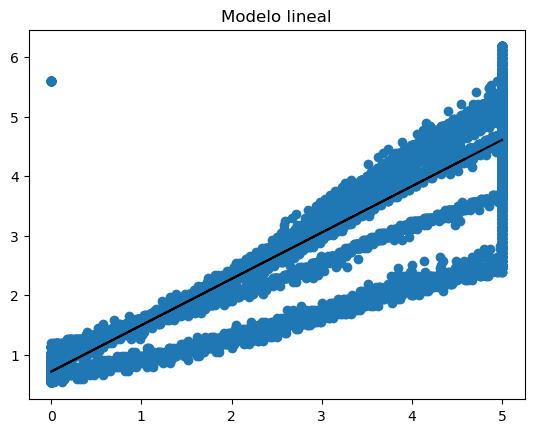

In [29]:
plt.figure()
plt.title('Modelo lineal')
plt.scatter(y_train, pred_tr)
plt.plot(y_train, ppi1.params[1]*y_train + ppi1.params[0], 'k')
plt.show()

In [30]:
y_train_ppi2 = sm.add_constant(y_train, prepend=True)
ppi2 = sm.OLS(y_pred_pol_train, y_train_ppi2)
ppi2 = ppi2.fit()
print(ppi2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 2.063e+05
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        13:22:04   Log-Likelihood:                -7462.1
No. Observations:               14000   AIC:                         1.493e+04
Df Residuals:                   13998   BIC:                         1.494e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2057      0.008     27.318      0.0

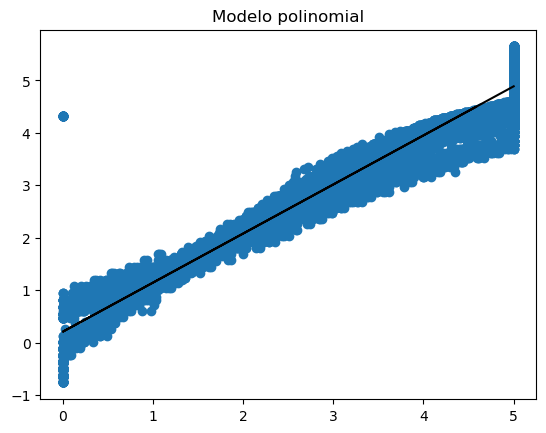

In [31]:
plt.figure()
plt.title('Modelo polinomial')
plt.scatter(y_train, y_pred_pol_train)
plt.plot(y_train, ppi2.params[1]*y_train + ppi2.params[0], 'k')
plt.show()